<a href="https://colab.research.google.com/github/DarthBogdo/UnempAnalysisProj/blob/main/Unemployment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred  # time-series financial and economic data source

In [ ]:
plt.style.use('fivethirtyeight')
pd.options.display.width = None  # an odd way to display all rows and columns
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
# so we are able to see more of the dataframe
# Color palette | a list colors we use to change the
# colors of our plots, so they are not the same
# Just pulls the default colors from whatever theme we are using in matplotlib
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']

<Axes: title={'center': 'S&P 500'}>

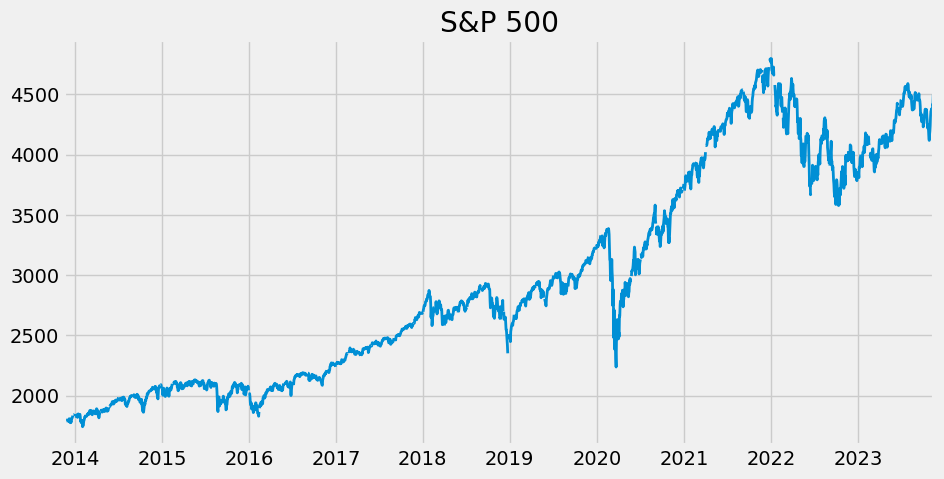

In [ ]:
fred_key = 'ceaae94ae71a32e1a83f3d4de5f4b1bb'

#  1.Create Fred object

fred = Fred(api_key=fred_key)

#  2.Search for economic data

sp_search = fred.search('S&P', order_by='popularity')
# print(sp_search)

#  3.Pull raw data & Plot

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

#  4. Pull and join multiple data series

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains("Unemployment Rate")]


all_results = []
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
filt_states = []
for state in states:
  state = state + "UR"
  filt_states.append(state)

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)


In [ ]:
unemp_results = pd.concat(all_results, axis=1)

filt_unemp_res = unemp_results.loc[:, unemp_results.columns[unemp_results.columns.isin(filt_states)]]

In [ ]:
unemp_states = filt_unemp_res.sort_index(axis=1)

In [ ]:
unemp_states.isna().sum(axis=1)

1929-04-01    50
1929-05-01    50
1929-06-01    50
1929-07-01    50
1929-08-01    50
1929-09-01    50
1929-10-01    50
1929-11-01    50
1929-12-01    50
1930-01-01    50
1930-02-01    50
1930-03-01    50
1930-04-01    50
1930-05-01    50
1930-06-01    50
1930-07-01    50
1930-08-01    50
1930-09-01    50
1930-10-01    50
1930-11-01    50
1930-12-01    50
1931-01-01    50
1931-02-01    50
1931-03-01    50
1931-04-01    50
1931-05-01    50
1931-06-01    50
1931-07-01    50
1931-08-01    50
1931-09-01    50
1931-10-01    50
1931-11-01    50
1931-12-01    50
1932-01-01    50
1932-02-01    50
1932-03-01    50
1932-04-01    50
1932-05-01    50
1932-06-01    50
1932-07-01    50
1932-08-01    50
1932-09-01    50
1932-10-01    50
1932-11-01    50
1932-12-01    50
1933-01-01    50
1933-02-01    50
1933-03-01    50
1933-04-01    50
1933-05-01    50
1933-06-01    50
1933-07-01    50
1933-08-01    50
1933-09-01    50
1933-10-01    50
1933-11-01    50
1933-12-01    50
1934-01-01    50
1934-02-01    

<Axes: >

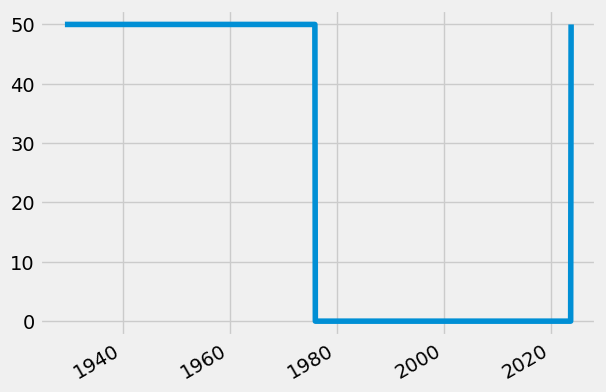

In [ ]:
unemp_states.isna().sum(axis=1).plot()

In [ ]:
unemp_states = unemp_states.dropna()
id_to_state = unemp_df[unemp_df['id'].isin(filt_states)]['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [ ]:
px.line(unemp_states)

#Pull Aptil 2020 Unemployment Rate Per State

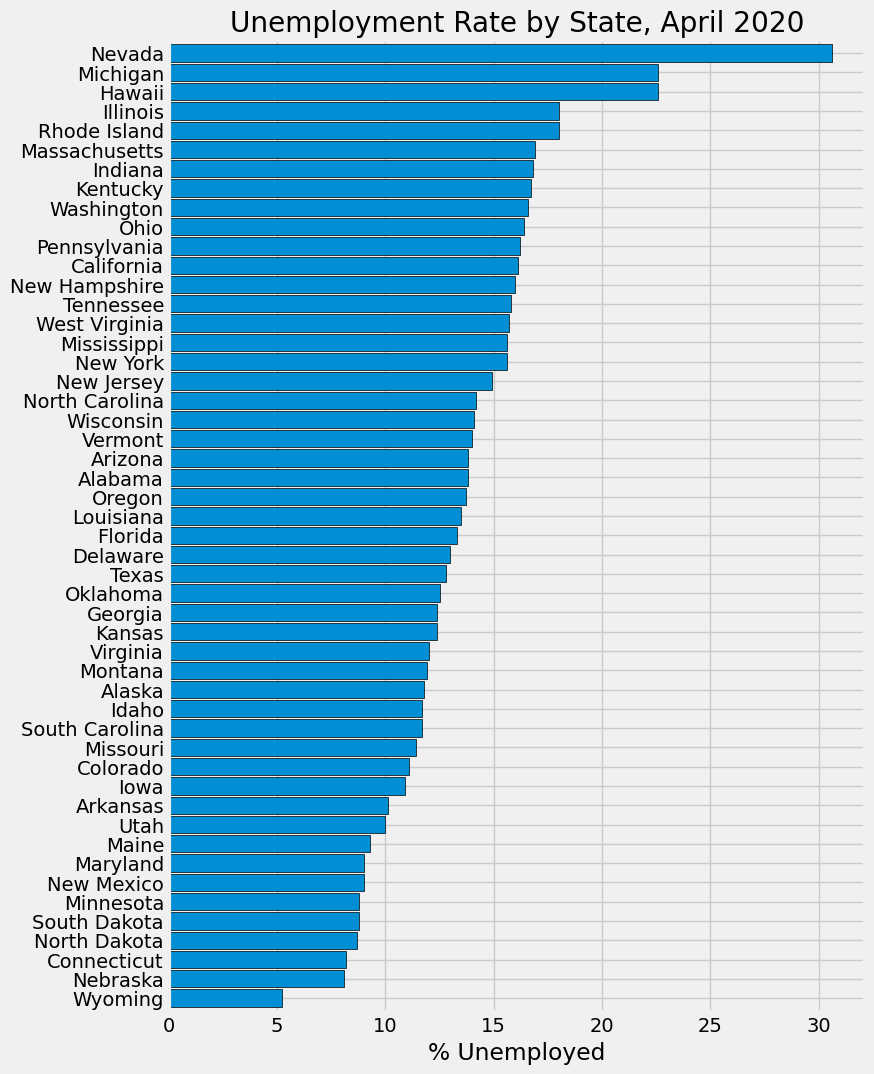

In [ ]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values('2020-04-01') \
  .plot(kind = 'barh', figsize =(8,12), width = 0.9, edgecolor = 'black', title = 'Unemployment Rate by State, April 2020')
plt.xlabel('% Unemployed')
ax.legend().remove()
plt.show()

#Pull Participation Rate

In [ ]:
import re
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#part_id_to_state = part_df.drop(index = part_df.index[51:]).str.replace('Labor Force Participation Rate for ', '').to_dict()

In [ ]:
titles = part_df['title']
pattern = re.compile('(Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut\
|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|\
Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|\
New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|\
Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|\
Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming)')


In [ ]:
cor_titles =[]
for i in range(len(titles)):
  matches = pattern.search(titles[i])
  if matches != None:
    cor_titles.append(i)

In [ ]:
part_df = part_df.iloc[cor_titles]

In [ ]:
all_results= []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.2)


In [ ]:
part_results = pd.concat(all_results, axis=1)
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()


In [ ]:
part_states = part_results.sort_index(axis=1)
part_states = part_states.dropna()

In [ ]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

#Plot Unemployment vs Participation

In [ ]:
#unemp_states = unemp_states.rename(columns={'the District of Columbia: District of Columbia'})

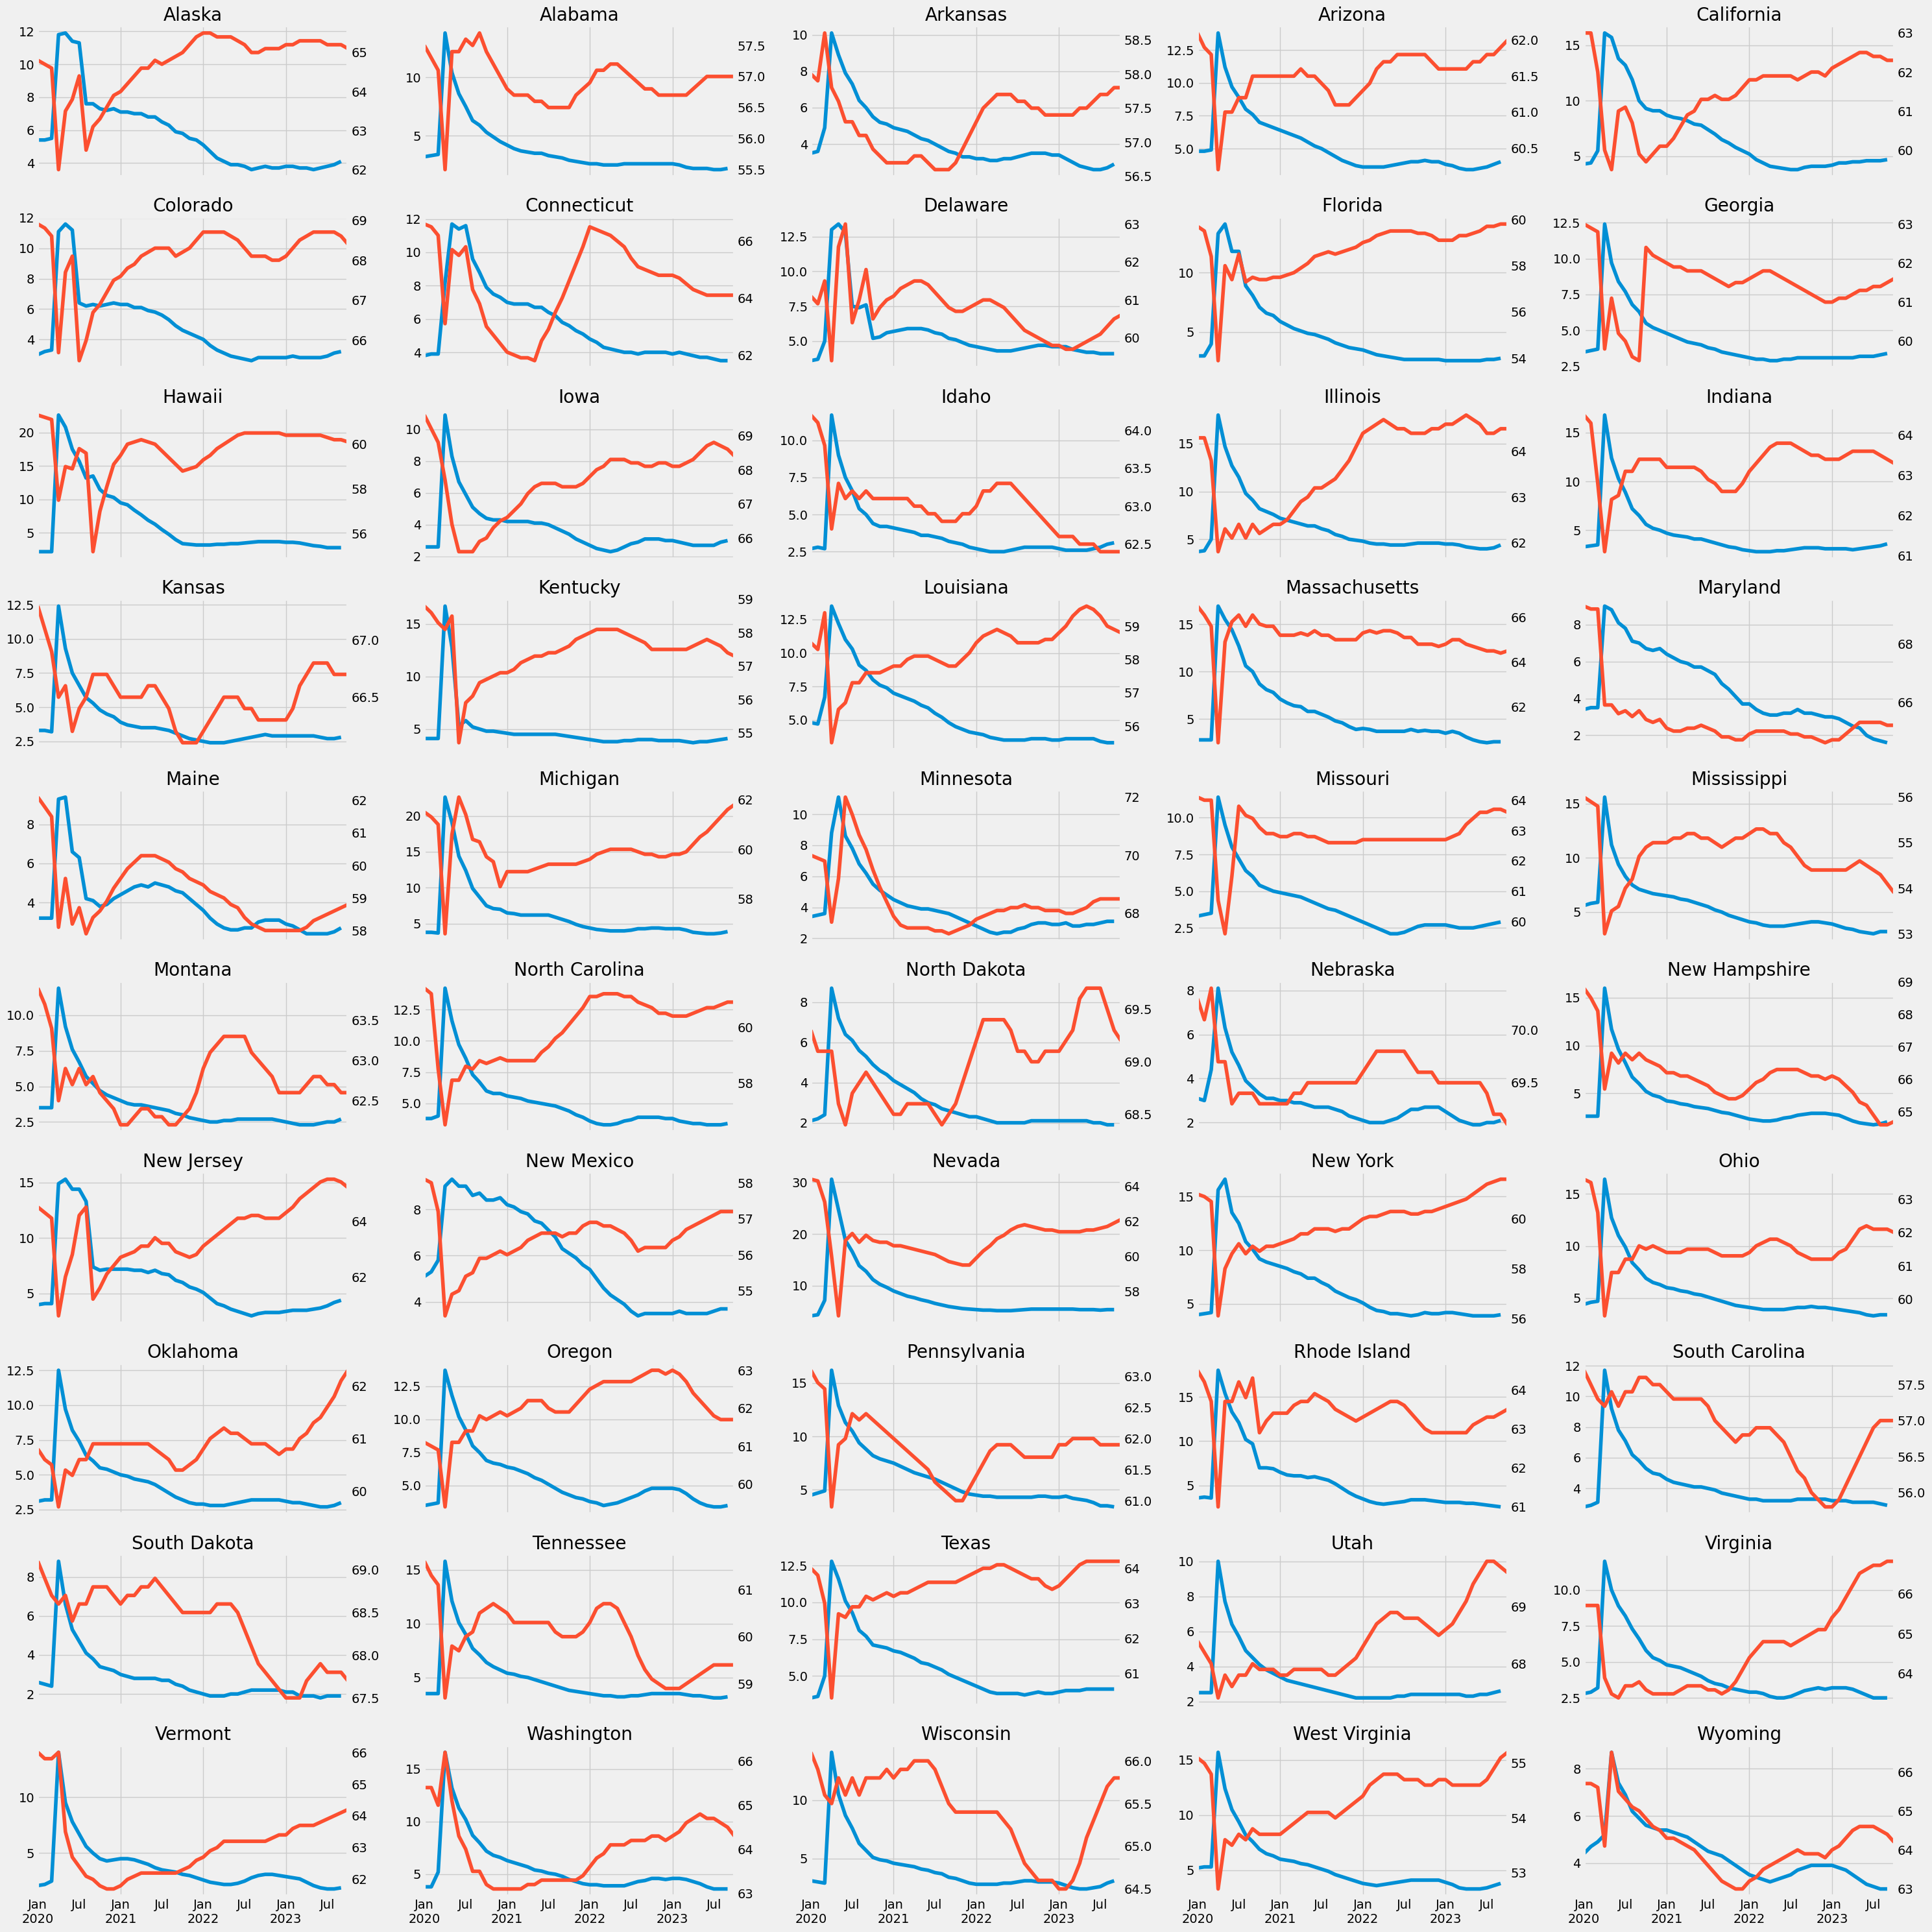

In [ ]:
fig, axs = plt.subplots(10,5, figsize=(30,30), sharex = True)
axs = axs.flatten() #!!!!!!!!!!!!!!!!!

i=0
for state in unemp_states.columns:
  ax2 = axs[i].twinx()
  unemp_states.query('index >=2020 and index < 2024')[state].plot(ax=axs[i], label='Unemployment')
  part_states.query('index >=2020 and index < 2024')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
  ax2.grid(False)
  axs[i].set_title(state)
  i+=1
plt.tight_layout()
plt.show()